# Libreries

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from collections import defaultdict
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tensorflow as tf


2025-03-28 19:27:31.656108: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-28 19:27:31.683743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743200851.716678    6762 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743200851.724603    6762 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-28 19:27:31.766381: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Definitions

In [2]:
test_path = "/home/lucas/code/LucasMareque/projects/ina_utn/datasets/Abril2023/test_roboflow_final"
model_path= '/home/lucas/code/LucasMareque/projects/ina_utn/Modelos/Best_models/Copy of model_Encoder_SSIM+MAE0.keras'

# Confusion matrix

In [3]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [4]:
results = []
def plot_conf_matrix(model, generator, titulo='Confusion matrix'):
    ### RETRIVE TEST LABEL FROM GENERATOR ###
    test_num = sum(1 for _ in generator)
    label_test = []
    pred_test = []
    for i, batch in enumerate(generator):
        X, y = batch
        label_test.append(y)
        predictions = model.predict(X,verbose=0)
        predictions = tf.nn.softmax(predictions)
        pred_test.append(predictions)

    label_test = np.argmax(np.vstack(label_test), axis=1)
    

    ### COMPUTE PREDICTIONS ON TEST DATA ###
    pred_test = np.argmax(np.vstack(pred_test), axis=1)
    #rint(pred_test)
    accuracy=accuracy_score(label_test, pred_test)
    recall=recall_score(label_test, pred_test,pos_label=0)
    specificity=recall_score(label_test, pred_test,pos_label=1)
    precision = precision_score(label_test, pred_test, pos_label=0)
    # pred_test = pred_test[:label_test.shape[0],]
    ### ACCURACY ON TEST DATA ###
    print("-" * 40)
    print('ACCURACY:', accuracy)
    print('RECALL:',recall)
    print('PRECISION:', precision)
    print('SPECIFICITY:',specificity)
    print("-" * 40)
    print("\n")
    ### CONFUSION MATRIX ON TEST DATA ###
    cnf_matrix = confusion_matrix(label_test, pred_test)
    results.append({'Model': titulo, 'Accuracy': accuracy , 'Recall':recall,'Precision':precision,'Specificity':specificity})

    plt.figure(figsize=(7,7))
    plot_confusion_matrix(cnf_matrix, classes=['cell', 'not'], title=titulo)
    plt.title(titulo)
    plt.show()

# Predictions - total

2025-03-28 19:27:37.478686: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1743200858.795441    6821 service.cc:148] XLA service 0x7f8ee400f770 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743200858.795634    6821 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-03-28 19:27:38.822027: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743200859.170060    6821 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/home/lucas/.pyenv/versions/3.10.6/envs/inaenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samp

----------------------------------------
ACCURACY: 0.8285714285714286
RECALL: 0.8285714285714286
PRECISION: 1.0
SPECIFICITY: 0.0
----------------------------------------




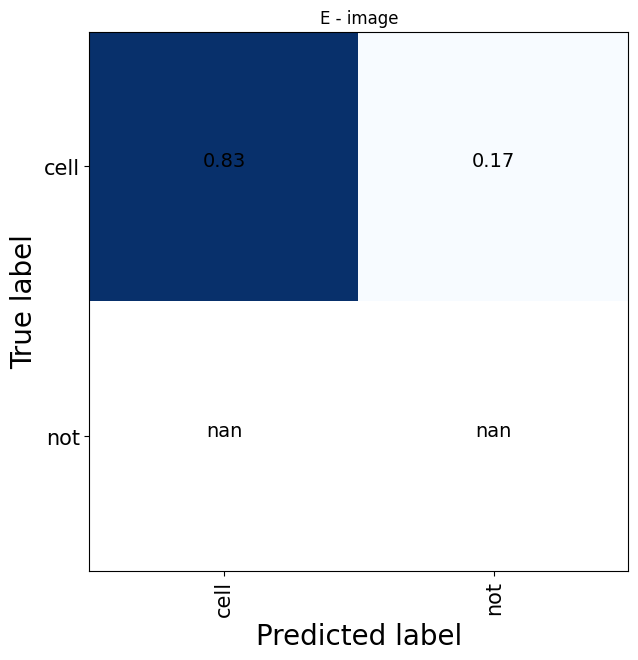

----------------------------------------
ACCURACY: 0.9263157894736842
RECALL: 0.9473684210526315
PRECISION: 0.8780487804878049
SPECIFICITY: 0.9122807017543859
----------------------------------------




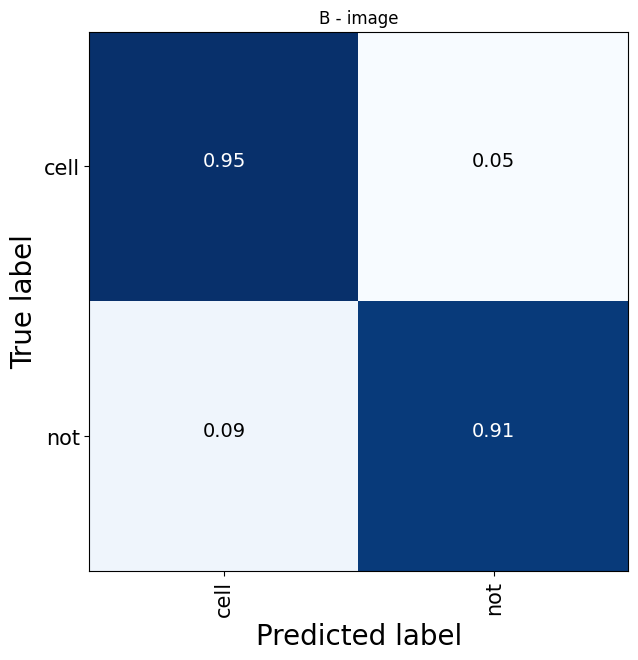

----------------------------------------
ACCURACY: 0.9338235294117647
RECALL: 0.9649122807017544
PRECISION: 0.8870967741935484
SPECIFICITY: 0.9113924050632911
----------------------------------------




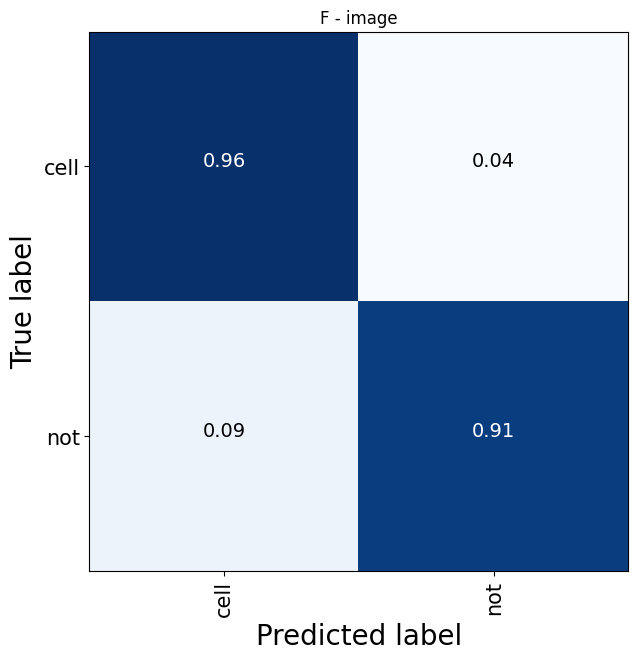

----------------------------------------
ACCURACY: 0.9694656488549618
RECALL: 0.9552238805970149
PRECISION: 0.9846153846153847
SPECIFICITY: 0.984375
----------------------------------------




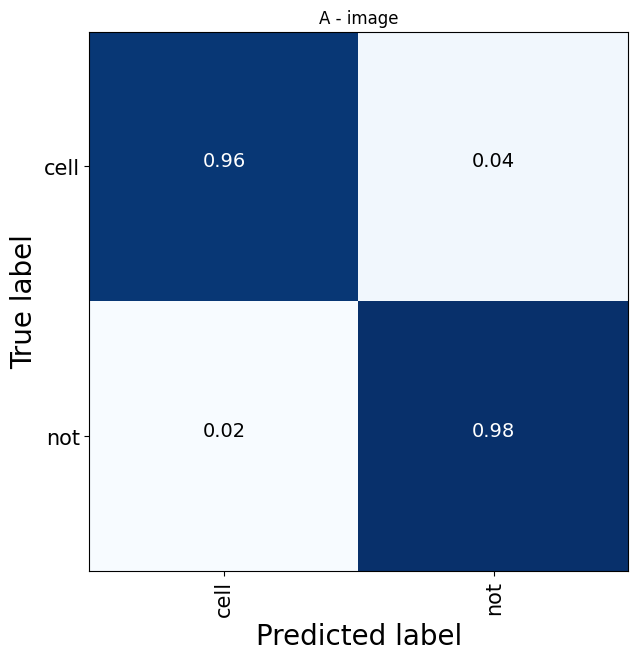

----------------------------------------
ACCURACY: 0.8947368421052632
RECALL: 0.7954545454545454
PRECISION: 0.9210526315789473
SPECIFICITY: 0.9571428571428572
----------------------------------------




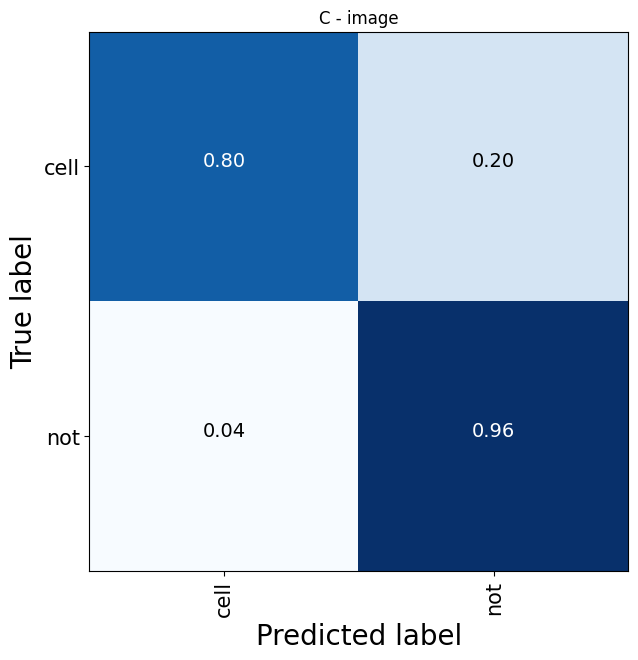

----------------------------------------
ACCURACY: 0.935064935064935
RECALL: 0.918918918918919
PRECISION: 0.9444444444444444
SPECIFICITY: 0.95
----------------------------------------




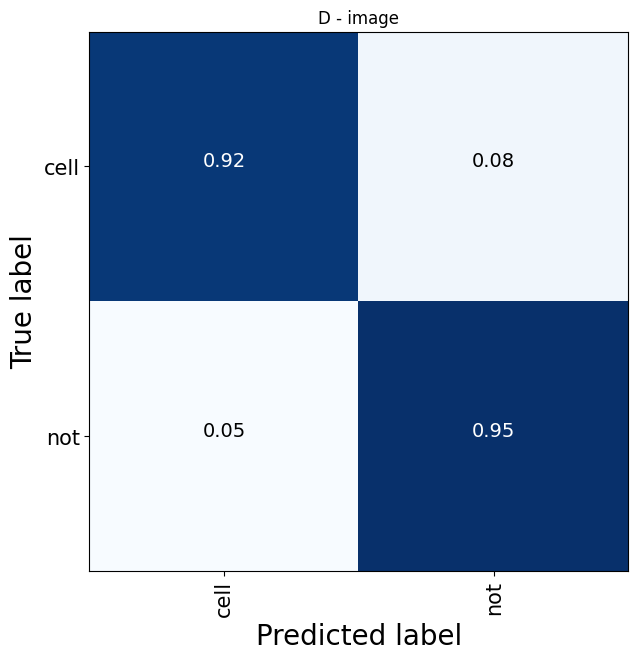

In [5]:
types_images=['cells', 'not']
images_groups = defaultdict(list)

for i in types_images:
  path_tmp=os.path.join(test_path,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      prefix = img[:1]
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups[prefix].append([img,y])


images_groups  = dict(images_groups )

model = load_model(model_path)
for name,imgs in images_groups.items():
  plot_conf_matrix(model, imgs, name + ' - image')

In [6]:
results_df = pd.DataFrame(results)

print(results_df)

       Model  Accuracy    Recall  Precision  Specificity
0  E - image  0.828571  0.828571   1.000000     0.000000
1  B - image  0.926316  0.947368   0.878049     0.912281
2  F - image  0.933824  0.964912   0.887097     0.911392
3  A - image  0.969466  0.955224   0.984615     0.984375
4  C - image  0.894737  0.795455   0.921053     0.957143
5  D - image  0.935065  0.918919   0.944444     0.950000


# Predictions - special cells

In [7]:
types_images=['cells','not']
images_groups=[]

for i in types_images:
  path_tmp=os.path.join(test_path,i)
  images=os.listdir(path_tmp)
  if i=='special_cells' or i=='cells' :
    y=[1,0]
  else:
    y=[0,1]

  for img in images:
      path_image=os.path.join(path_tmp,img)
      img = image.load_img(path_image, color_mode='grayscale', target_size=(128, 128))
      img=np.array(img) / 255.0
      img = np.expand_dims(img, axis=-1)
      img = np.expand_dims(img, axis=0)
      images_groups.append([img,y])

model = load_model(model_path)
label_test = []
pred_test = []
for i, batch in enumerate(images_groups):
    X, y = batch
    label_test.append(y)
    predictions = model.predict(X,verbose=0)
    pred_test.append(predictions)
label_test = np.argmax(np.vstack(label_test), axis=1)
### COMPUTE PREDICTIONS ON TEST DATA ###
pred_test = np.argmax(np.vstack(pred_test), axis=1)
accuracy=accuracy_score(label_test, pred_test)
recall=recall_score(label_test, pred_test,pos_label=0)
specificity=recall_score(label_test, pred_test,pos_label=1)
precision = precision_score(label_test, pred_test, pos_label=0)
# pred_test = pred_test[:label_test.shape[0],]
### ACCURACY ON TEST DATA ###
print("-" * 40)
print('ACCURACY:', accuracy)
print('RECALL:',recall)
print('PRECISION:', precision)
print('SPECIFICITY:',specificity)
print("-" * 40)
print("\n")

----------------------------------------
ACCURACY: 0.9213483146067416
RECALL: 0.9009584664536742
PRECISION: 0.94
SPECIFICITY: 0.9419354838709677
----------------------------------------


